In [1]:
import nbsetup as nb
import seaborn as sns
import pandas as pd
import numpy as np
import ensemblepy as ep
import matplotlib.pyplot as plt

In [2]:
def plot_discrete(discrete, xlabel='', xlim=(None, None), ylim=(None, None), xticks=False, ax=None):
    """
    Plots the distributions for a Discrete
    """
    data = []
    for e, h in enumerate(discrete.histograms):
        hs = np.sum(h)
        for i, v in enumerate(h):
            data.append({'x': discrete.bins[i],'y': v/hs, 'ensemble': e})
    df = pd.DataFrame(data)

    g = sns.lineplot(data=df, x='x', y='y', hue='ensemble',
        legend=False, palette='Blues_r', ax=ax)
    g.set(xlabel=xlabel, ylabel='', yticks=[])
    
    pmf = discrete.ergodic_pmf()
    twin = ax.twinx()
    sns.lineplot(x=discrete.bins[:-1], y=pmf, color=ep.LEGEND['pooled'][1], ax=twin)
    twin.set(yticks=[])
    if not xticks:
        g.set(xticks=[])
    if xlim:
        g.set(xlim=xlim)

    return g

In [11]:
def plot_example(config, xlabel, cohesion=False, bins=50, std=5, xlim=(None, None), obs=10000, figsize=(5,6)):
    fig, axes = plt.subplots(len(config), sharex=True, sharey=False, figsize=figsize)
    plt.tight_layout()
    palette = 'mako'
    
    ensembles = []
    for c, ax in enumerate(axes):
        label, vals = config[c]
        data = np.array([np.random.normal(i, std, obs) for i in vals])
        e = ep.Discrete(data, ep.binspace(*xlim, bins))
        plot_discrete(e, xlabel=xlabel, xlim=xlim, xticks=True, ax=ax)
        print(c)
        print('inc:', e.incoherence)
        print('means', data.mean(), data.mean(axis=1))
        ensembles.append(e)
        ax.axvline(x=data.mean(), color='red', linestyle='dotted')
        if cohesion:
            ax.set(title="%s: μ=%.0f, I=%.2f, C=%.2f" % (label, data.mean(), e.incoherence, e.cohesion))
        else:
            ax.set(title="%s: μ=%.0f, I=%.2f" % (label, data.mean(), e.incoherence))
    
    return fig, ensembles

0
inc: 0.005229618453360174
means 100.00394068994909 [ 99.97878551  99.96918259 100.10526242  99.96547306 100.00099987]
1
inc: 0.029518742787039146
means 95.60245740909815 [94.9582483  96.04040698 95.99842249 97.97239292 93.04281635]
2
inc: 0.2895536555452422
means 93.776321827158 [101.97423386  99.8968859   95.03951277  81.97790777  89.99306883]


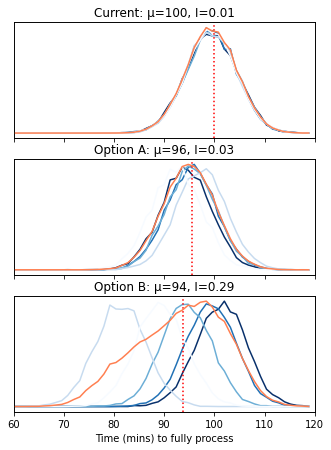

In [12]:
plot_example((
    ('Current', (100,100,100,100,100)),
    ('Option A', (95, 96, 96, 98, 93)),
    ('Option B', (102, 100, 95, 82, 90,)),
), 'Time (mins) to fully process', False, xlim=(60,120))[0].savefig('incoherence-example.eps')

0
inc: 0.0045150712120851895
means 100.36973726242209 [ 99.92833545 100.06030463  99.91092606 101.00636126 100.94275891]
1
inc: 0.3147071694616711
means 91.63196439826423 [ 83.11514124 104.99490012  95.00339015  85.01415999  90.03223049]
2
inc: 0.3576886002380373
means 99.19319480908057 [ 82.03000692 109.9324388  111.01901375  82.98511889 109.99939569]


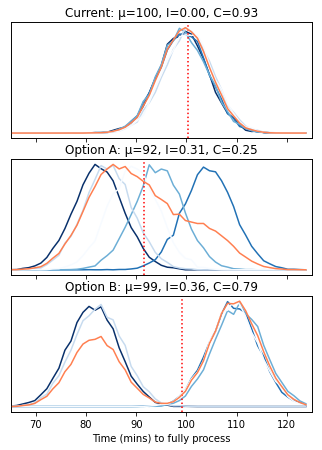

In [13]:
fig, data = plot_example((
    ('Current', (100,100,100,101,101)),
    ('Option A', (83, 105, 95, 85, 90)),
    ('Option B', (82, 110, 111, 83, 110)),
), 'Time (mins) to fully process', True, xlim=(65,125))
fig.savefig('cohesion-example.eps')

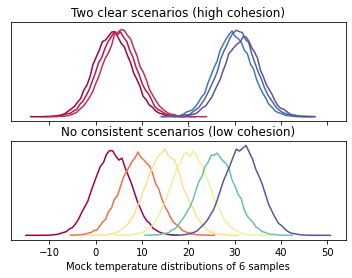

In [82]:
fig, (first, second) = plt.subplots(2,1, sharex=True, sharey=True, figsize=(6, 4))
#plt.tight_layout()
obs = 30000
bins = 50
palette = 'Spectral'

for ax, vals in ((first, (4, 5, 6, 30, 31, 32)), (second, np.linspace(4, 32, 6))):
    data = []
    for i in vals:
        y, x = np.histogram(np.random.normal(i, 4, obs), bins=bins)
        for j, v in enumerate(y):
            data.append({'x':x[j], 'y':v, 'i': i})
    
    sns.lineplot(data=pd.DataFrame(data), x='x', y='y', hue='i', palette=palette, ax=ax, legend=False)


for d in (first, second):
    d.set(xlabel='Mock temperature distributions of 6 samples', ylabel=None, yticks=[])


first.set(title='Two clear scenarios (high cohesion)')
second.set(title='No consistent scenarios (low cohesion)')

fig.savefig('illustration.eps')

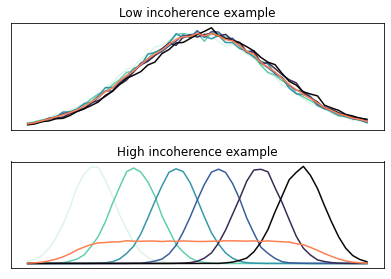

In [83]:
fig, (first, second) = plt.subplots(2,1, figsize=(6, 4))
plt.tight_layout()
obs = 30000
bins = np.linspace(-10,20,50)

for ax, vals, var in ((first, np.linspace(5,6,6), 6), (second, np.linspace(-4, 14, 6), 2)):
    data = []
    for i in vals:
        y, x = np.histogram(np.random.normal(i, var, obs), bins=bins)
        for j, v in enumerate(y):
            data.append({'x':x[j], 'y':v, 'i': i})
        
    df = pd.DataFrame(data)
    sns.lineplot(data=df, x='x', y='y', hue='i', palette='mako_r', ax=ax, legend=False)
    sns.lineplot(data=df.groupby('x').mean().reset_index(), x='x', y='y', ax=ax, color='coral')

for d in (first, second):
    d.set(ylabel=None, yticks=[], xticks=[], xlabel=None)


first.set(title='Low incoherence example')
second.set(title='High incoherence example')

fig.savefig('incoherence.eps')

In [13]:
[-4. , -0.2,  4.2,  6.0, 13.4, 14. ]

array([-4. , -0.4,  3.2,  6.8, 10.4, 14. ])

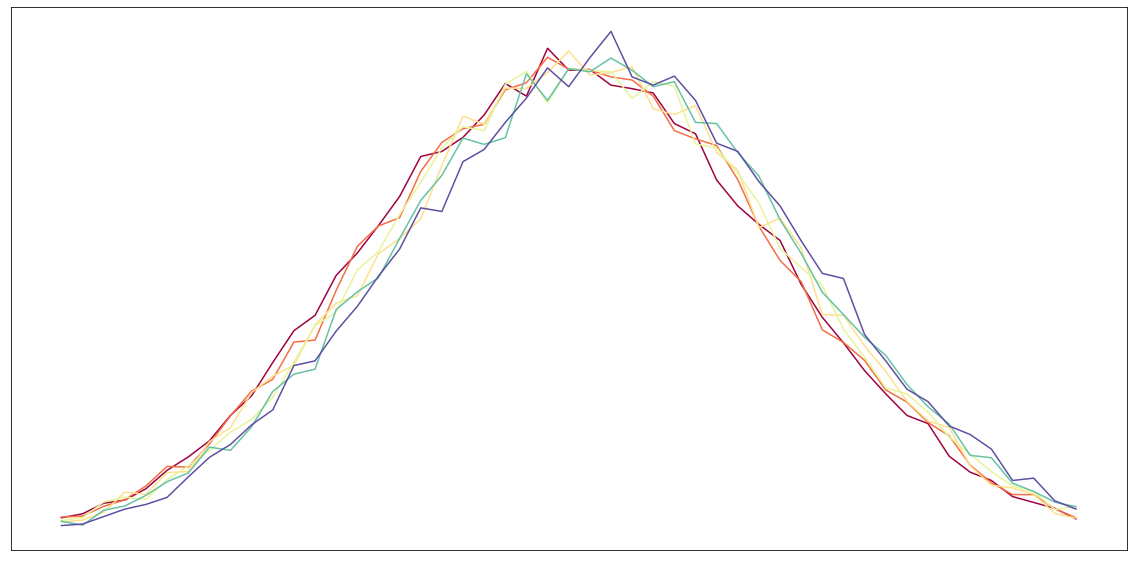

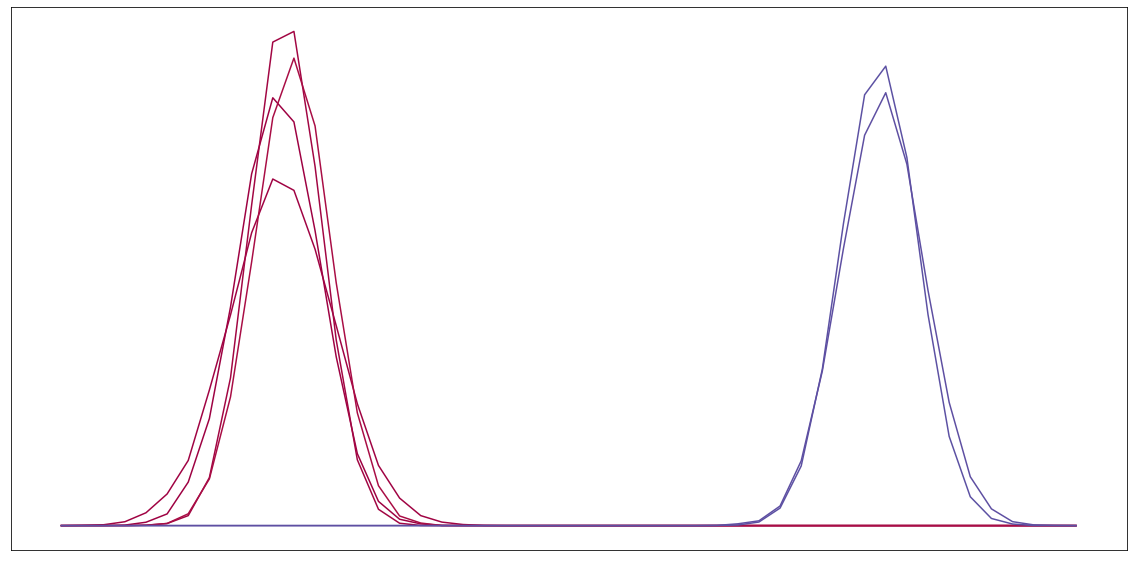

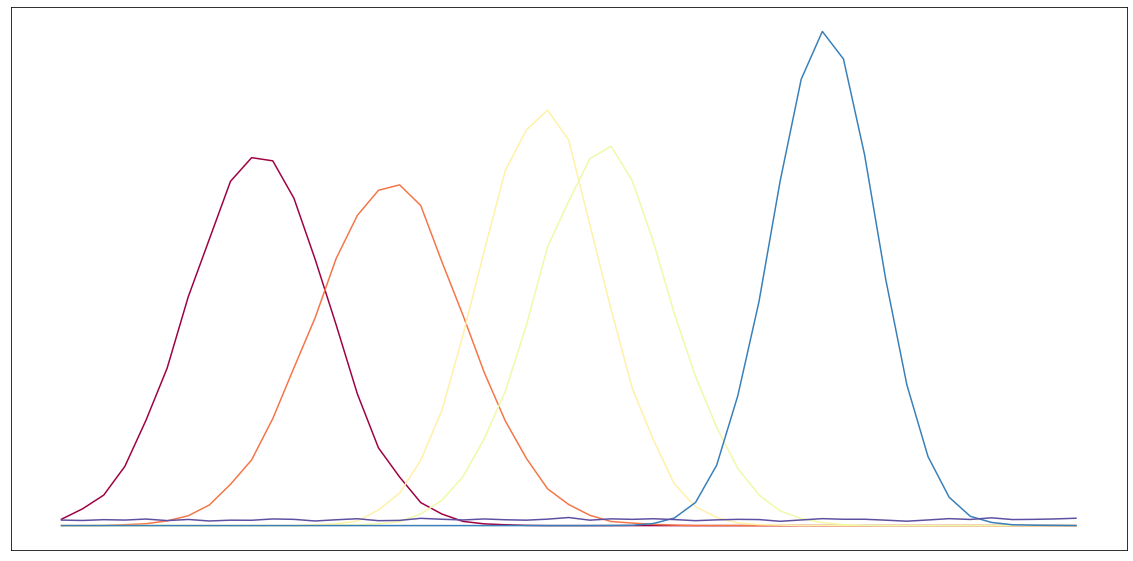

In [42]:
plots = (
    ('low-inc', 'Low incoherence (very consistent)', np.linspace(5,6,6), [6,6,6,6,6,6]),
    ('high-coh', 'High incoherence, high cohesion (overall inconsistent but two clear scenarios)', (-3.4, -3, -3.2, -3.3, 14, 14.1), [1.2,1.1,1,1.5,1.1,1.2]),
    ('low-coh', 'High incoherence, low cohesion (inconsistent everytime)', [-4. , -0.2,  4.2,  6.0, 12.4, 14. ], [2, 2.2, 1.8, 2, 1.5, 125])
)


for name, title, vals, var in plots:
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    obs = 30000
    bins = np.linspace(-10,20,50)
    #ax.set(title=title)
    data = []
    for c, i in enumerate(vals):
        y, x = np.histogram(np.random.normal(i, var[c], obs), bins=bins)
        for j, v in enumerate(y):
            data.append({'x':x[j], 'y':v, 'i': i})
        
    df = pd.DataFrame(data)
    sns.lineplot(data=df, x='x', y='y', hue='i', palette='Spectral', ax=ax, legend=False)
    #sns.lineplot(data=df.groupby('x').mean().reset_index(), x='x', y='y', ax=ax, color='coral')
    
    ax.set(ylabel=None, yticks=[], xticks=[], xlabel=None)
    fig.savefig('%s.png' % name)

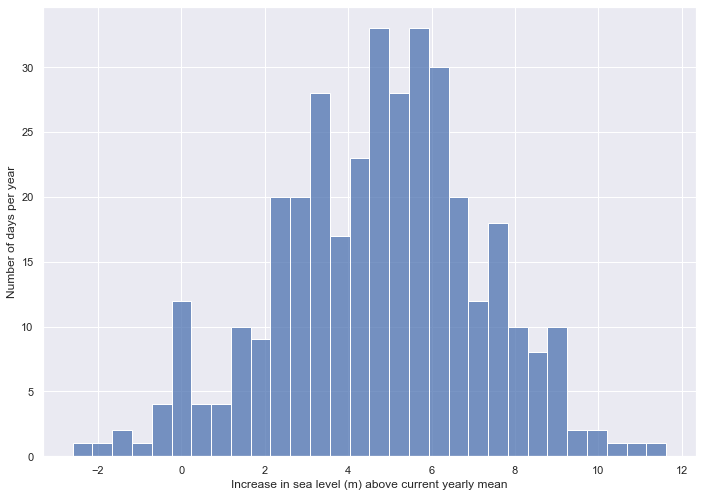

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.histplot(np.random.normal(5,2.5,365), bins=30)
g.set(xlabel='Increase in sea level (m) above current yearly mean', ylabel='Number of days per year')
g.get_figure().savefig('seahist.png')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


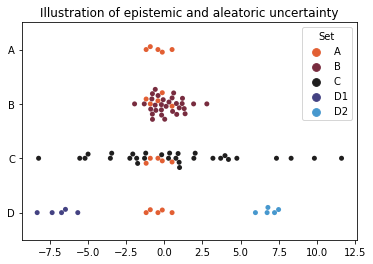

In [92]:
base = np.random.normal(0,2,5)
data = []
for b in base:
    for cat in 'ABCD':
        data.append({'cat': cat, 'val': b, 'Set': 'A'})

for cat, row in (('B', np.random.normal(0, 1, 30)), ('C', np.random.normal(0, 5, 30))):
    for b in row:
        data.append({'cat': cat, 'val': b, 'Set': cat})

for s, row in (('D1', np.random.normal(-7,1,5)), ('D2', np.random.normal(7,1,5))):
    for b in row:
        data.append({'cat': 'D', 'val': b, 'Set': s})

df = pd.DataFrame(data)
g = sns.swarmplot(data=df, x='val', y='cat', hue='Set', palette='icefire_r')
g.set(title='Illustration of epistemic and aleatoric uncertainty', ylabel='', xlabel='')
g.get_figure().savefig('aleatoric.eps')